Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "In Wai Cheong"
COLLABORATORS = ""

---

In [2]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

# Homework 1:  Introduction

## Question 1 - Basic Linear Algebra

Write out the solution (by-hand) to the following sets of equations.  **FULLY** justify your solution (do not just write the answer).

If you want to review some of these concepts check out Strang's [Linear Algebra](https://clio.columbia.edu/catalog/10612929) text or for only the fundamentals check out Strang's [The Fundamental Theorem of Linear Algebra](http://www.jstor.org/stable/2324660?seq=1#page_scan_tab_contents)

**(a)** (5) Solve $A x = \mathbf{b}$ where
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3
    \end{bmatrix} ~~~~ 
    \mathbf{b} = \begin{bmatrix}
        1 \\
        -2
    \end{bmatrix}
$$

### Solution

Create the augmented matrix:

\begin{bmatrix}
2 & 1 & 1 \\
1 & 3 & -2
\end{bmatrix}

Swap row 1 and row 2:

\begin{bmatrix}
1 & 3 & -2 \\
2 & 1 & 1
\end{bmatrix}

Doing $R_2=R_2-2R_1$ gives:

\begin{bmatrix}
1 & 3 & -2 \\
0 & -5 & 5
\end{bmatrix}

Dividing row 2 by $-5$:

\begin{bmatrix}
1 & 3 & -2 \\
0 & 1 & -1
\end{bmatrix}

Doing $R_1=R_1-3R_2$:

\begin{bmatrix}
1 & 0 & 1 \\
0 & 1 & 1
\end{bmatrix}

This gives us:

$$
\begin{pmatrix}
 1 & 0\\ 
0 & 1 
\end{pmatrix}\begin{pmatrix}
x_1\\ 
x_2
\end{pmatrix}=\begin{pmatrix}
1\\ 
-1
\end{pmatrix}
$$

This gives us our solution:

$$
x_1=1,x_2=-1
$$




**(b)** (5) Solve the system of equations:
\begin{align}
    2x + 3y &= 1 \\
    6x + 9y &= 3
\end{align}

### Solution

The augmented matrix:

\begin{bmatrix}
2 & 3 & 1 \\
6 & 9 & 3
\end{bmatrix}

Dividing row 2 by $3$ gives us:

\begin{bmatrix}
2 & 3 & 1 \\
2 & 3 & 1
\end{bmatrix}

Performing the operation $R_2 = R_2 - R_1$:

\begin{bmatrix}
2 & 3 & 1 \\
0 & 0 & 0
\end{bmatrix}

Diving the first row by $2$:

\begin{bmatrix}
1 & \frac{3}{2} & \frac{1}{2} \\
0 & 0 & 0
\end{bmatrix}

We get:

$$
\begin{pmatrix}
 1 & \frac{3}{2}\\ 
0 & 0 
\end{pmatrix}\begin{pmatrix}
x_1\\ 
x_2
\end{pmatrix}=\begin{pmatrix}
\frac{1}{2}\\ 
0
\end{pmatrix}
$$

$x_2$ is our free variable so our solution is:

$$
x_1=\frac{1}{2}-\frac{3}{2}x_2
$$

**(c)** (5) Why will I not be able to solve $A\mathbf{x}=\mathbf{b}$ for

$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3 \\
        0 & 4
    \end{bmatrix} ~~~~ 
    \mathbf{b} = \begin{bmatrix}
        2 \\
        0 \\
        1
    \end{bmatrix}?
$$

Describe why this is a problem in terms of the column, row, left-null, and null spaces of $A$ and how that relates to the vector $\mathbf{b}$.

### Solution

There exists no solutions because the $\mathbf{b}$ matrix is not in the vector space of the column or row vectors of generated by $A$. Also, the nullspace of $A$ is formed by the basis: 

\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}

and thus has only the trivial solution $x_1 = x_2 = 0$

Also, we have that $x_2 = \frac{1}{4}$ and if we substitute it back to $x_1+3x_2=0$ we get $x_1=-\frac{3}{4}$ and doing
$2(-\frac{3}{4})+\frac{1}{4}=2$ is a false statement.

## Question 2 -- a simple python function

**(a)** (10) Write a function that computes
$$
    \sum^\infty_{n=1} \frac{a^n}{b^{n-1}}
$$
until the difference between subsequent partial sums is less than the given tolerance $T$.  Return the computed sum.  Make sure to include a way for the function to exit if the partial sums do not satisfy the above criteria (the sum may not be convergent for instance).

In [3]:
def compute_sum(a, b, tolerance=1e-5):
    """Compute the sum $\sum^\infty_{n=1} a^n / b^{n-1} until the partial sums are less than *tolerance*.
    
    Returns the computed sum and raises a *ValueError* if the sum appears to be diverging.
    """
    
    n=1
    computed_sum = 0
    previous_sum = 0
    diff = 1e5
    
    if abs(a)>abs(b):
        raise ValueError("Series Diverges")
        
    while abs(diff) >= tolerance: 
        previous_sum = computed_sum
        computed_sum += (a**n) / (b**(n-1))
        diff = computed_sum - previous_sum
        n=n+1
      
    return computed_sum

In [4]:
numpy.testing.assert_allclose(compute_sum(-2.0, 3.0, 1e-16), -1.2)
numpy.testing.assert_allclose(compute_sum(1.0, 2.0, 1e-16), 2.0)
try:
    compute_sum(2.0, 1.0, 1e-16)
except ValueError:
    pass
else:
    assert False

**(b)** (5) Explore different tolerances for your function above for $a=-2$ and $b=3$.  Plot the value of the tolerance
$$
    \left| ~ \sum^\infty_{n=1} \frac{a^n}{b^{n-1}} - (-1.2) ~\right |
$$
versus the difference.  The plotting command `loglog` may be useful to effectively visualize the problem.  What do you observe?

Hint:  Try using tolerances in the range $T \in [10^{-30}, 10^{-2}]$.  Use the functions `logspace` to generate well spaced points and `loglog` to plot the data.

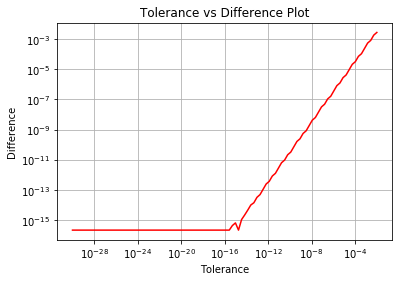

In [5]:
# YOUR CODE HERE

lst = []
tol2 = numpy.logspace(-30, -2,100)
for i in tol2:
    tolerance2 = numpy.abs(compute_sum(-2,3,tolerance=i) - (-1.2))
    lst.append(tolerance2)

plt.title("Tolerance vs Difference Plot")
plt.xlabel("Tolerance")
plt.ylabel("Difference")
plt.grid()
plt.loglog(tol2,lst,'red')

aosfjadspfj

## Question 3 - Taylor Series

(7) Compute the first 3 terms of the Taylor series of the function
$$
    f(x) = e^{-x^2} \sin( x - \pi)
$$
centered at $x_0 = \pi$.

### Solution:

The first three terms of a Taylor series centered at $x_0=a$ is:

$$
f(x)=\displaystyle\sum_{n=0}^{2} \frac{f^{(n)}(a)}{n!}(x-a)^n
$$
$$
=f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^2
$$

For our function and it being centered about $x_0=\pi$:

$$
f(x)=f(\pi) + f'(\pi)(x-\pi)+\frac{f''(\pi)}{2!}(x-\pi)^2
$$

Computing the 1st and 2nd derivatives of $f(x)$ yields:

$$
f'(x)=-e^{-x^2}(cos(x)-2xsin(x)
$$
$$
f''(x)=e^{-x^2}[(3-4x^2)sin(x)+4xcos(x)]
$$

Evaluating our $f(x)$, 1st, and 2nd derivatives at $x=\pi$

$$
f(\pi)=0
$$
$$
f'(\pi)=e^{-\pi^2}
$$
$$
f''(\pi)=-4e^{-\pi^2}\pi
$$

Putting it together:

$$
f(x)=0+e^{-\pi^2}(x-\pi)-\frac{4e^{-\pi^2}\pi}{2}(x-\pi)^2
$$

Cleaning up:

$$
f(x)=e^{-\pi^2}(x-\pi)-2e^{-\pi^2}\pi(x-\pi)^2
$$

## Question 4 - Basic ODE's

(8) Solve the ODE (by hand)
$$
    u'' + u' + \frac{5}{4} u = 0
$$
with initial conditions $u(0) = 3$ and $u'(0) = 1$.  Comment on its behavior as $t \rightarrow \infty$.

### Solution:

Since this is a second-order linear differential equation, and it's homogeneous - we can write down its corresponding auxiliary polynomial:

$$
m^2+m+\frac{5}{4}m = 0
$$

Solving using the quadratic formula, we get the nonreal solution:

$$
m=-\frac{1}{2} \pm i
$$

Since both roots are not real, the corresponding general solution to this equation is:

$$
u(t)=e^{-\frac{1}{2}t}(c_1sin(t)+c_2cos(t))
$$

With our boundary value $u(0)=3$ we get $c_2=3$:

$$
u(t)=3e^{-\frac{1}{2}t}cos(t)+c_1e^{-\frac{1}{2}t}sin(t)
$$

Taking the derivative with respect to $x$ gives us:

$$
u'(t)=-\frac{1}{2}e^{-\frac{1}{2}t}[c_1(sin(t)-2cos(t))+3(2sin(t)+cos(t))]
$$

With our boundary value $u'(0)=1$ we get $c_1=\frac{5}{2}$ we gives us our solution:

$$
u(t)=e^{-\frac{1}{2}t}(\frac{5}{2}sin(t)+3cost)
$$

As $t \rightarrow \infty$, $u(t)$ approaches $0$.

Plot the solution $u(t)$

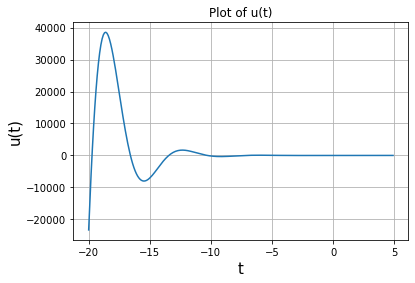

In [6]:
plt.title("Plot of u(t)")
plt.xlabel("t", fontsize=15)
plt.ylabel("u(t)", fontsize=15)
x = numpy.arange(-20, 5, 0.1)
y = numpy.exp(-0.5*x)*(2.5*numpy.sin(x)+3*numpy.cos(x))
plt.plot(x,y)
plt.grid()
plt.show()

## Question 5 - using matplotlib

(5) Plot something "fun" making sure to label the axes and colorbar if appropriate.  Use the [matplotlib gallery](http://matplotlib.org/gallery.html) for inspiration.

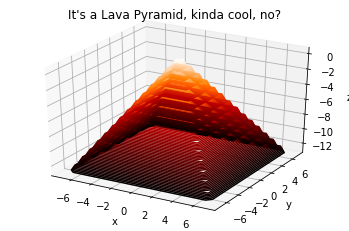

In [7]:
#Wanted to make a 3d plot of an object
from mpl_toolkits import mplot3d

x = numpy.linspace(-7,7,30)
y = numpy.linspace(-7,7,30)
X,Y = numpy.meshgrid(x,y)
Z = 1-abs(X+Y)-abs(Y-X)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap="gist_heat")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("It's a Lava Pyramid, kinda cool, no?")
plt.show()

## Question 6 - The Trouble with Tribbles

**The Problem**
The number of tribbles (furry animals from Star Trek) is modeled by Spock to be exponential.  Spock predicts that in a 3 day period that the tribbles will go from an initial population number of $N_0 = 1$ to $N(3) = 1,771,561$ tribbles.  The assumptions that Spock made are the following:
 - The tribbles reproduce every 12 hours.
 - Tribbles reproduce asexually so that 1 tribble will produce 10 more tribbles leading to a total of 11 tribbles.

**(a)** (2) Write a function that confirms Spock's estimate

In [8]:
def N(t):
    """ return the number of tribbles at time t (in days) given that 1 tribble will reproduce 
        asexually every 12 hours to produce 10 more tribbles.  N can be a real number
    """
# YOUR CODE HERE
    population = numpy.exp(numpy.log(121)*t)
    return int(population)

In [9]:
assert(N(3) == 1771561)

**(b)** (3) Make a plot of N(t) for t=3 days (assuming it is a continous function), using the appropriate plot types making sure to adding labels, units, and titles.  Also refer to the [matplotlib gallery](http://matplotlib.org/gallery.html) to figure out how to plot some of what is asked.

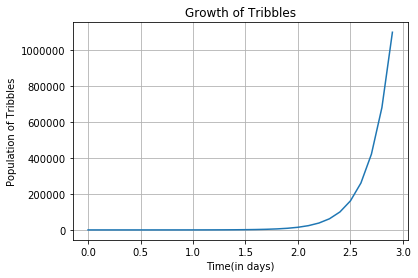

In [10]:
# YOUR CODE HERE
plt.title("Growth of Tribbles")
plt.xlabel("Time(in days)")
plt.ylabel("Population of Tribbles")
x = numpy.arange(0,3,0.1)
y = numpy.exp(numpy.log(121)*x)
plt.plot(x,y)
plt.grid()
plt.show()

**(c)** [5] Assuming that tribbles cannot stack themselves on top of each other perfectly we also would like to model and plot the spread of tribbles throughout our space ship.  Assume our space ship is a square use the following function to plot the population on our space ship of tribbles:
$$
    N(x, y) = N_0 e^{-r^2/\sigma^2}
$$
where $N_0 = 1000$, $\sigma = 0.1$ and $r$ is the distance from the middle of our space ship.

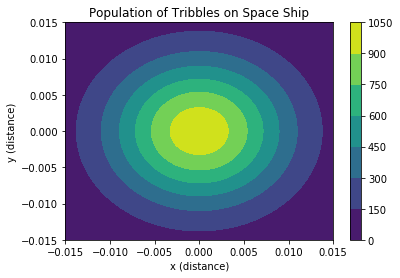

In [12]:
# YOUR CODE HERE
x = numpy.linspace(-0.015, 0.015, 100)
y = numpy.linspace(-0.015, 0.015, 100)
X, Y = numpy.meshgrid(x, y)
r = numpy.sqrt(X**2 + Y**2)
Z = 1000*numpy.exp(-10000*r**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x ,y, Z)
fig.colorbar(cp) 
ax.set_title('Population of Tribbles on Space Ship')
ax.set_xlabel('x (distance)')
ax.set_ylabel('y (distance)')
plt.show()